# **ARTIFICIAL INTELLIGENCE & CHATBOT**

**CHECKPOINT 6** - Análise Exploratória e Modelo Não Supervisionado

**PROF:** Felipe Souza Amaral

**ALUNA:** Marina Yumi Kanadani | **RM:** 558404 | **TURMA:** 1TDSPX

**FIAP | NOVEMBRO | 2024**

# **DATASET** _"IGN GAMES FROM BEST TO WORST"_

**ESCOLHA DO DATASET**

Escolhi o dataset do Kaggle _"IGN games from best to worst"_ por interesse pessoal e pelas seguintes características:
- *Usability:* 10.00
- *Update:* 07/11/2024
- *Densidade de Dados:* 12589 valores únicos de títulos de jogos

**DEFINIÇÃO DOS OBJETIVOS**
- Agrupar jogos segundo gênero, plataforma e nota: identificar segmentos de jogos com características similares.
- Agrupar jogos segundo gênero e data de lançamento: observar quais gêneros se popularizaram mais em determinados períodos.
- Agrupar jogos segundo gênero e nota: avaliar relação entre gêneros e notas.

# **ANÁLISE EXPLORATÓRIA**

**BIBLIOTECAS**

Iniciaremos carregando as bibliotecas necessárias.

In [40]:
# Análise e manipulação de dados
import pandas as pd
import numpy as np

# Construção de gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Avaliação de desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

**DATASET**

Agora, vamos carregar o dataset e exibir as primeiras linhas.

In [41]:
# Carrega o dataset
games = pd.read_csv('ign-games.csv')
games.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


**TRADUÇÃO**

Vamos traduzir os nomes das colunas e das variáveis categórias (exceto títulos e plataformas, que não precisam ser traduzidos).

Primeiro, vamos separar as colunas das variáveis categóricas cujos valores desejamos traduzir: 'score_phrase' e 'genre'.

In [42]:
# Obtém os valores únicos para 'score_phrase' apenas
categorias_unicas_notas = games['score_phrase'].unique()

# Exibe as categorias únicas de notas
print("Categorias únicas de notas encontradas:")
print(categorias_unicas_notas)

# Cria um conjunto para armazenar todos os gêneros únicos
generos_unicos = set()

# Itera sobre os valores na coluna 'genre' e adiciona gêneros únicos ao conjunto
for generos in games['genre'].dropna():
    for genero in generos.split(', '):
        generos_unicos.add(genero.strip())

# Exibe os gêneros únicos
print("Gêneros únicos encontrados:")
print(np.array(list(generos_unicos)))

Categorias únicas de notas encontradas:
['Masterpiece' 'Amazing' 'Great' 'Good' 'Okay' 'Mediocre' 'Bad' 'Awful'
 'Painful' 'Unbearable' 'Disaster']
Gêneros únicos encontrados:
['Baseball' 'Trivia' 'Platformer' 'Hardware' 'Music' 'Other' 'Pinball'
 'Educational' 'Hunting' 'Golf' 'Action' 'Racing' 'Card' 'Adventure'
 'Editor' 'Sports' 'Battle' 'Adult' 'Puzzle' 'Strategy' 'First-Person'
 'Party' 'RPG' 'Episodic' 'Productivity' 'Fighting' 'Compilation'
 'Word Game' 'Flight' 'Simulation' 'Wrestling' 'Shooter' 'Casino'
 'Virtual Pet' 'Board']


Agora, faremos os dicionários necessários.

In [5]:
# Dicionário para traduzir as colunas
traducao_colunas = {
    'title': 'Título',
    'score': 'Nota',
    'score_phrase': 'Categoria da Nota',
    'platform': 'Plataforma',
    'genre': 'Gênero',
    'release_year': 'Ano de Lançamento',
    'release_month': 'Mês de Lançamento',
    'release_day': 'Dia de Lançamento',
}

# Dicionários para traduzir os valores das variáveis categóricas
traducao_categoria_nota = {
    'Masterpiece': 'Obra-prima',
    'Amazing': 'Incrível',
    'Great': 'Ótimo',
    'Good': 'Bom',
    'Okay': 'Ok',
    'Mediocre': 'Medíocre',
    'Bad': 'Ruim',
    'Awful': 'Horrível',
    'Painful': 'Doloroso',
    'Unbearable': 'Insuportável',
    'Disaster': 'Desastre',
}

traducao_genero = {
    'Party': 'Multijogador',
    'Racing': 'Corrida',
    'Puzzle': 'Quebra-cabeça',
    'Shooter': 'Tiro',
    'Strategy': 'Estratégia',
    'Sports': 'Esportes',
    'Virtual Pet': 'Pet Virtual',
    'Music': 'Música',
    'Card': 'Cartas',
    'Word Game': 'Jogo de Palavras',
    'Adult': 'Adulto',
    'Wrestling': 'Luta Livre',
    'Battle': 'Batalha',
    'Adventure': 'Aventura',
    'Compilation': 'Compilação',
    'Board': 'Tabuleiro',
    'Golf': 'Golfe',
    'Hunting': 'Caça',
    'Episodic': 'Episódico',
    'Platformer': 'Plataforma',
    'Productivity': 'Produtividade',
    'Flight': 'Voo',
    'Pinball': 'Pinball',
    'Simulation': 'Simulação',
    'Action': 'Ação',
    'Casino': 'Cassino',
    'Editor': 'Editor',
    'Educational': 'Educativo',
    'Fighting': 'Luta',
    'Baseball': 'Beisebol',
    'First-Person': 'Primeira Pessoa',
}

Finalmente, vamos substituir os valores com as traduções e visualizar as primeiras linhas alteradas.

In [43]:
# Função para traduzir cada gênero, incluindo gêneros compostos
def traduzir_genero(genero):
    if pd.isna(genero):
        return genero
    return ', '.join([traducao_genero.get(g.strip(), g.strip()) for g in genero.split(',')])

# Aplica as traduções na coluna 'score_phrase'
games['score_phrase'] = games['score_phrase'].replace(traducao_categoria_nota)

# Aplica as traduções na coluna 'genre' usando a função personalizada para gêneros compostos
games['genre'] = games['genre'].apply(traduzir_genero)

# Aplica as traduções nos nomes das colunas
games.rename(columns=traducao_colunas, inplace=True)

# Exibe as primeiras linhas do dataset
print(games.head())

                Título  Nota Categoria da Nota      Plataforma  \
0       Checkered Flag  10.0        Obra-prima            Lynx   
1       Chrono Trigger  10.0        Obra-prima             Wii   
2   Dragon Warrior III  10.0        Obra-prima  Game Boy Color   
3  Grand Theft Auto IV  10.0        Obra-prima        Xbox 360   
4  Grand Theft Auto IV  10.0        Obra-prima   PlayStation 3   

           Gênero  Ano de Lançamento  Mês de Lançamento  Dia de Lançamento  
0         Corrida               1999                  7                  6  
1       Ação, RPG               2011                  5                 25  
2             RPG               2001                  7                 20  
3  Ação, Aventura               2008                  4                 25  
4  Ação, Aventura               2008                  4                 25  


**DESCRIÇÃO DOS DADOS**

Vamos exibir o número de linhas e colunas, seguido dos tipos de variáveis presentes.

In [44]:
# Número de linhas e colunas
num_linhas, num_colunas = games.shape
print(f"Número de linhas: {num_linhas}, Número de colunas: {num_colunas}")

# Descrição dos dados
print("\nInformações do dataset:")
games.info()

# Exibe colunas numéricas
colunas_numericas = games.select_dtypes(include=['number']).columns
print("\nColunas numéricas:", colunas_numericas)

# Exibe colunas categóricas
colunas_categoricas = games.select_dtypes(include=['object']).columns
print("\nColunas categóricas:", colunas_categoricas)

Número de linhas: 18625, Número de colunas: 8

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Título             18625 non-null  object 
 1   Nota               18625 non-null  float64
 2   Categoria da Nota  18625 non-null  object 
 3   Plataforma         18625 non-null  object 
 4   Gênero             18589 non-null  object 
 5   Ano de Lançamento  18625 non-null  int64  
 6   Mês de Lançamento  18625 non-null  int64  
 7   Dia de Lançamento  18625 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB

Colunas numéricas: Index(['Nota', 'Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento'], dtype='object')

Colunas categóricas: Index(['Título', 'Categoria da Nota', 'Plataforma', 'Gênero'], dtype='object')


**DADOS FALTANTES**

A seguir, vamos identificar e tratar os dados faltantes.

In [45]:
# Quantidade de células vazias por coluna
print("Presença de células vazias:")
print(games.isnull().sum())

Presença de células vazias:
Título                0
Nota                  0
Categoria da Nota     0
Plataforma            0
Gênero               36
Ano de Lançamento     0
Mês de Lançamento     0
Dia de Lançamento     0
dtype: int64


Considerando que há apenas 36 dados faltantes na coluna "Gênero", o que corresponde a apenas 0,2% do dataset, optei por remover estas linhas.

In [47]:
# Remoção dos dados faltantes
games.dropna(subset=['Gênero'], inplace=True)

**ANÁLISE DESCRITIVA**

Por fim, vamos realizar a análise descritiva dos dados. Inicialmente, avaliaremos as variáveis numéricas.

In [48]:
# Estatísticas para variáveis numéricas
print("Estatísticas para variáveis numéricas:")
print(games.describe().round(2))

# Média (arredondada para datas e convertida para inteiros)
print("\nMédia:")
media = games.mean(numeric_only=True)
print(media[['Nota']])
print(media[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].round(0).astype(int))

# Mediana (arredondada para datas e convertida para inteiros)
print("\nMediana:")
mediana = games.median(numeric_only=True)
print(mediana[['Nota']])
print(mediana[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].round(0).astype(int))

# Máximo (exibindo todas as colunas como inteiros onde aplicável)
print("\nMáximo:")
maximo = games[['Nota', 'Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].max()
print(maximo[['Nota']])
print(maximo[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].astype(int))

# Desvio Padrão (arredondado apenas para exibição)
print("\nDesvio Padrão:")
desvio_padrao = games.std(numeric_only=True)
print(desvio_padrao[['Nota']])
print(desvio_padrao[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].round(2))


Estatísticas para variáveis numéricas:
           Nota  Ano de Lançamento  Mês de Lançamento  Dia de Lançamento
count  18589.00           18589.00           18589.00           18589.00
mean       6.95            2006.51               7.14              15.60
std        1.71               4.59               3.48               8.69
min        0.50            1970.00               1.00               1.00
25%        6.00            2003.00               4.00               8.00
50%        7.30            2007.00               8.00              16.00
75%        8.20            2010.00              10.00              23.00
max       10.00            2016.00              12.00              31.00

Média:
Nota    6.950853
dtype: float64
Ano de Lançamento    2007
Mês de Lançamento       7
Dia de Lançamento      16
dtype: int64

Mediana:
Nota    7.3
dtype: float64
Ano de Lançamento    2007
Mês de Lançamento       8
Dia de Lançamento      16
dtype: int64

Máximo:
Nota    10.0
dtype: float64
Ano de L

Agora, veremos as variáveis categóricas.

In [49]:
# Distribuição de frequências para variáveis categóricas em porcentagem
print("Distribuição de frequências para variáveis categóricas (%): \n")

# Frequência de `score_phrase` em porcentagem
print((games['Categoria da Nota'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

# Frequência de `platform` em porcentagem
print()
print((games['Plataforma'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

# Frequência de `genre` em porcentagem
print()
print((games['Gênero'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

Distribuição de frequências para variáveis categóricas (%): 

Categoria da Nota
Ótimo           25.63%
Bom             25.42%
Ok              15.82%
Medíocre        10.53%
Incrível          9.7%
Ruim             6.82%
Horrível         3.56%
Doloroso         1.82%
Insuportável     0.39%
Obra-prima        0.3%
Desastre         0.02%
Name: proportion, dtype: object

Plataforma
PC                      18.11%
PlayStation 2            9.06%
Xbox 360                 8.77%
Wii                      7.33%
PlayStation 3            7.29%
Nintendo DS              5.62%
PlayStation              5.12%
Wireless                 4.87%
iPhone                   4.45%
Xbox                     4.42%
PlayStation Portable      3.4%
Game Boy Advance         3.35%
GameCube                 2.74%
Game Boy Color           1.92%
Nintendo 64              1.62%
Dreamcast                1.54%
PlayStation 4            1.49%
Nintendo DSi             1.36%
Nintendo 3DS             1.19%
Xbox One                 1.12%
Pla

**REPRESENTAÇÃO GRÁFICA**

Facilitaremos a visualização dos dados por meio de gráficos. Primeiro, vamos visualizar quais notas correspondem a cada categoria de nota.

In [50]:
# Agrupa as notas por Categoria da Nota e calcula o valor mínimo e máximo para cada uma
intervalo_notas_por_categoria = games.groupby('Categoria da Nota')['Nota'].agg(['min', 'max']).reset_index()

# Renomeia as colunas min e max para Nota Mínima e Nota Máxima
intervalo_notas_por_categoria = intervalo_notas_por_categoria.rename(columns={'min': 'Nota Mínima', 'max': 'Nota Máxima'})

# Ordena a tabela pelo valor mínimo da nota em ordem decrescente
intervalo_notas_por_categoria = intervalo_notas_por_categoria.sort_values(by='Nota Mínima', ascending=False).reset_index(drop=True)

# Exibe a tabela de intervalo de notas por categoria
print("Intervalo de Notas por Categoria da Nota:\n")
print(intervalo_notas_por_categoria.to_string(index=False))

Intervalo de Notas por Categoria da Nota:

Categoria da Nota  Nota Mínima  Nota Máxima
       Obra-prima         10.0         10.0
         Incrível          9.0          9.9
            Ótimo          8.0          8.9
              Bom          7.0          7.9
               Ok          6.0          6.9
         Medíocre          5.0          5.9
             Ruim          4.0          4.9
         Horrível          3.0          3.9
         Doloroso          2.0          2.9
     Insuportável          1.0          1.9
         Desastre          0.5          0.8


**JOGOS POR CATEGORIA DE NOTA**

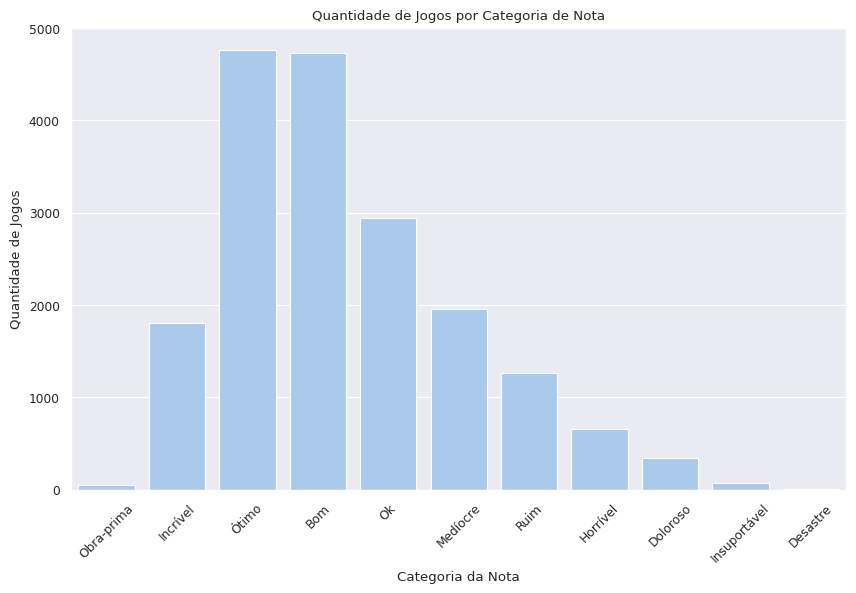

In [51]:
# Configurações de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# GRÁFICO DE BARRAS para a quantidade de jogos por categoria de nota
plt.figure(figsize=(10, 6))
sns.countplot(data=games, x='Categoria da Nota')
plt.title('Quantidade de Jogos por Categoria de Nota')
plt.xlabel('Categoria da Nota')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.show()

**JOGOS POR PLATAFORMA**

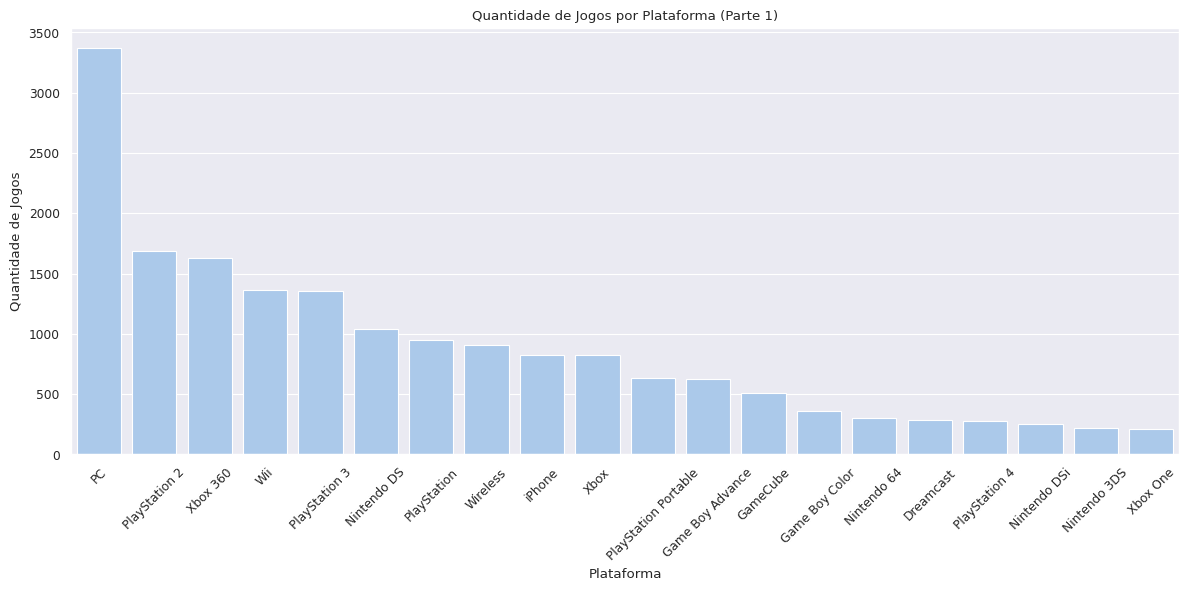

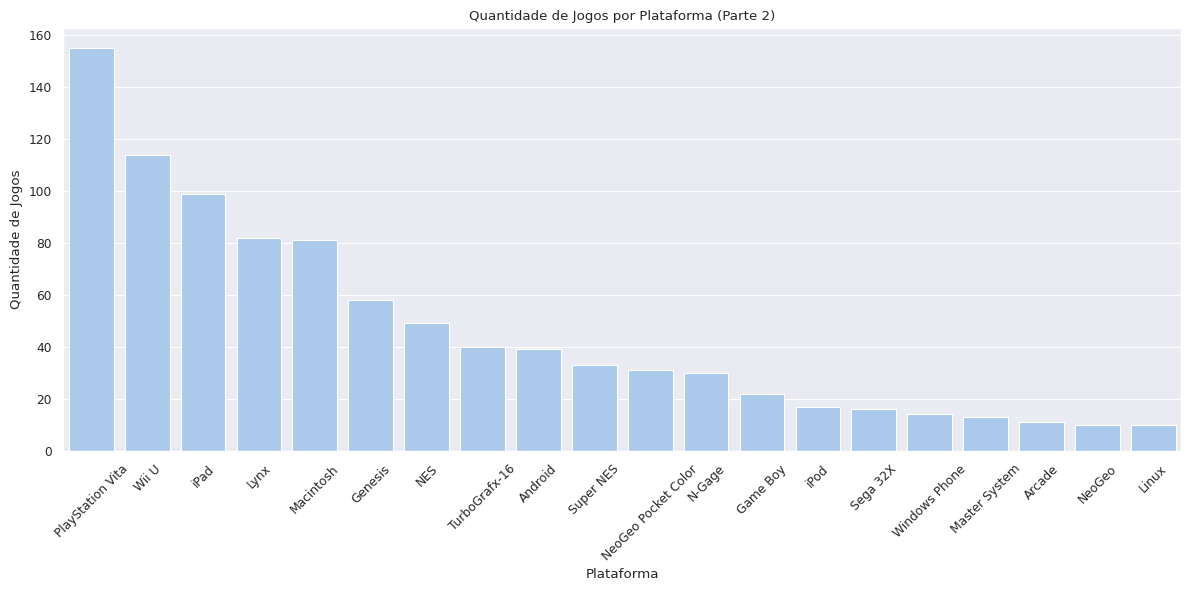

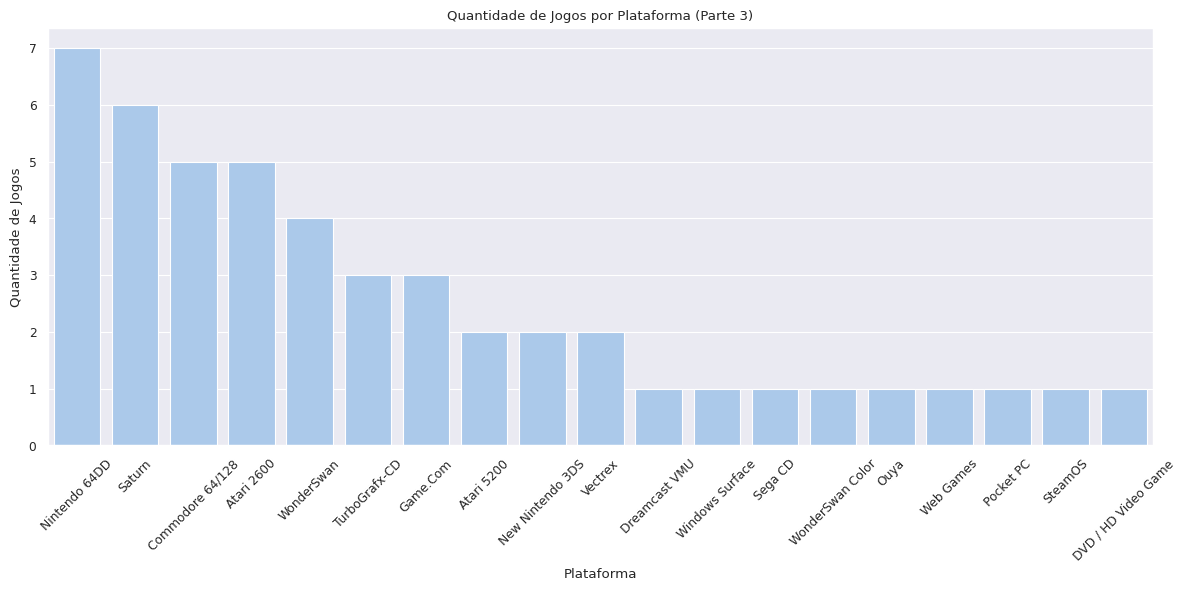

In [67]:
# Configurações de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# Conta jogos por plataforma
contagem_plataformas = games['Plataforma'].value_counts()

# Divide as plataformas em três partes
num_plataformas = len(contagem_plataformas)
split_size = num_plataformas // 3 + (num_plataformas % 3 > 0)
plataformas_partes = [contagem_plataformas[i:i+split_size] for i in range(0, num_plataformas, split_size)]

# GRÁFICOS DE BARRAS para cada parte
for idx, parte in enumerate(plataformas_partes):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=parte.index, y=parte.values)
    plt.title(f'Quantidade de Jogos por Plataforma (Parte {idx+1})')
    plt.xlabel('Plataforma')
    plt.ylabel('Quantidade de Jogos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**JOGOS POR GÊNERO**

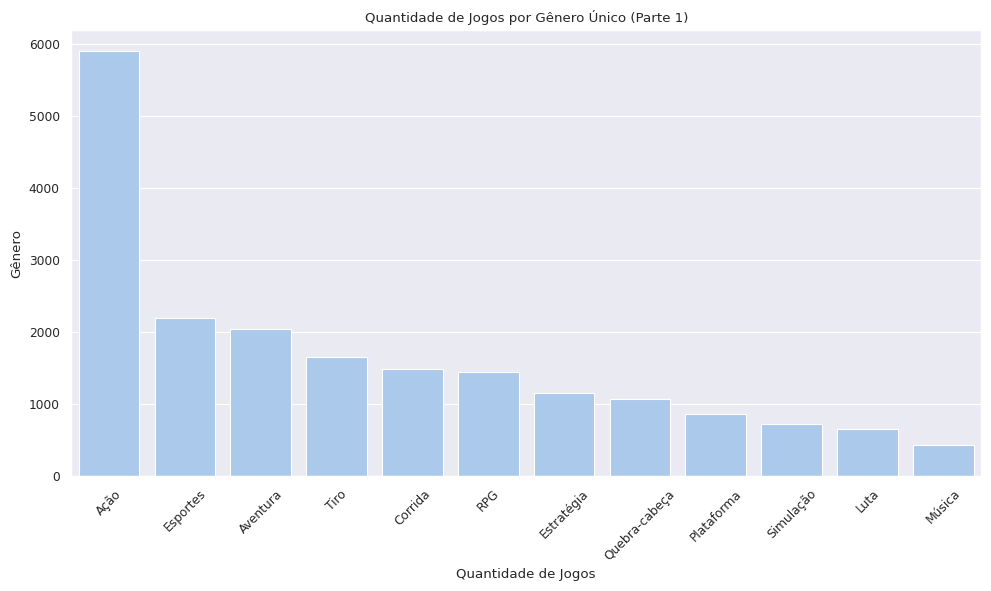

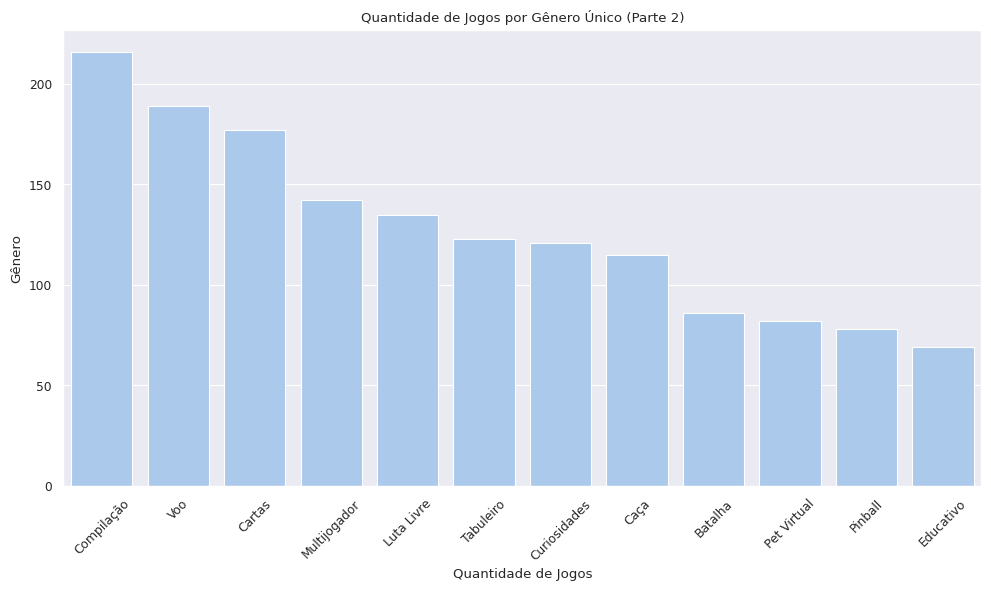

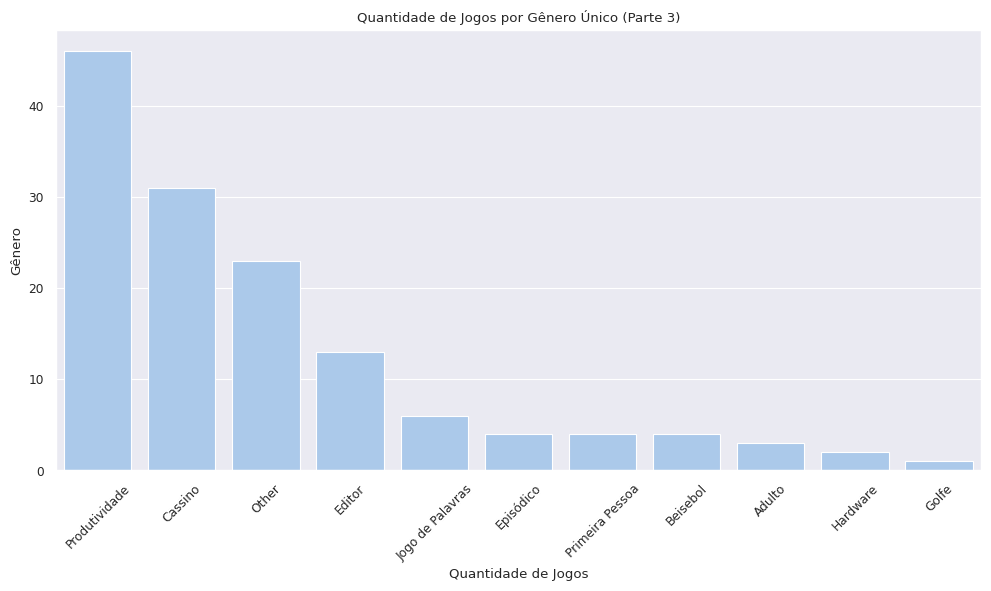

In [68]:
# Configurações de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separa gêneros em linhas individuais e conta cada gênero
generos_expandidos = games['Gênero'].dropna().str.split(', ').explode()
contagem_generos_unicos = generos_expandidos.value_counts().reset_index()
contagem_generos_unicos.columns = ['Gênero', 'Quantidade']

# Divide os gêneros em três partes
num_generos = len(contagem_generos_unicos)
split_size = num_generos // 3 + (num_generos % 3 > 0)
generos_partes = [contagem_generos_unicos[i:i+split_size] for i in range(0, num_generos, split_size)]

# GRÁFICOS DE BARRAS para cada parte
for idx, parte in enumerate(generos_partes):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=parte, x='Gênero', y='Quantidade')
    plt.title(f'Quantidade de Jogos por Gênero Único (Parte {idx+1})')
    plt.xlabel('Quantidade de Jogos')
    plt.ylabel('Gênero')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**JOGOS POR ANO**

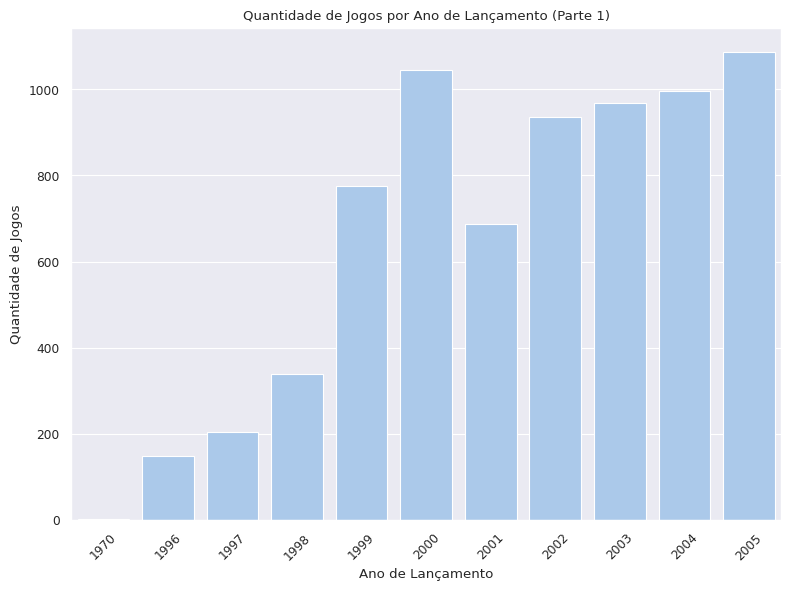

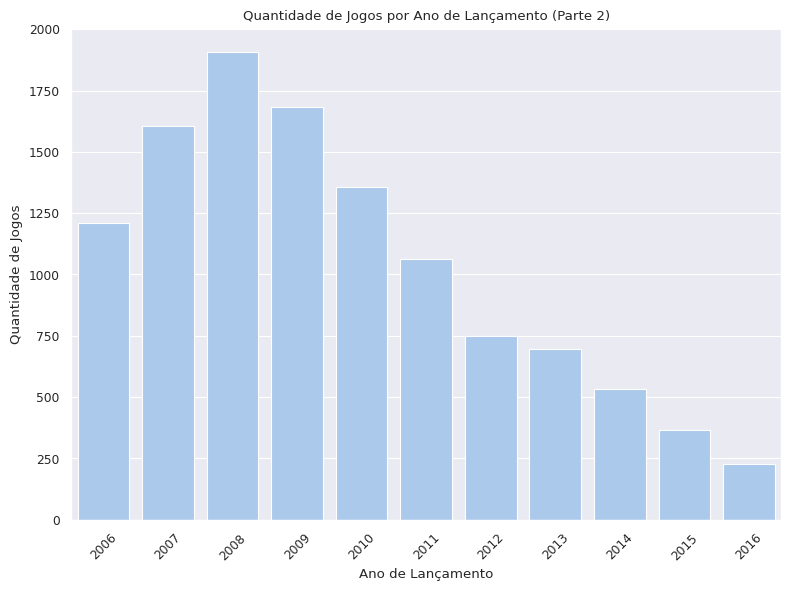

In [79]:
# Configurações de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# Conta a quantidade de jogos por ano e organiza em ordem crescente
contagem_anos = games['Ano de Lançamento'].value_counts().sort_index().reset_index()
contagem_anos.columns = ['Ano', 'Quantidade']

# Divide o DataFrame em duas partes
num_anos = len(contagem_anos)
split_size = num_anos // 2 + (num_anos % 2 > 0)
anos_partes = [contagem_anos[i:i+split_size] for i in range(0, num_anos, split_size)]

# GRÁFICOS DE BARRAS para cada parte
for idx, parte in enumerate(anos_partes):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=parte, x='Ano', y='Quantidade')
    plt.title(f'Quantidade de Jogos por Ano de Lançamento (Parte {idx+1})')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Quantidade de Jogos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**JOGOS POR MÊS**

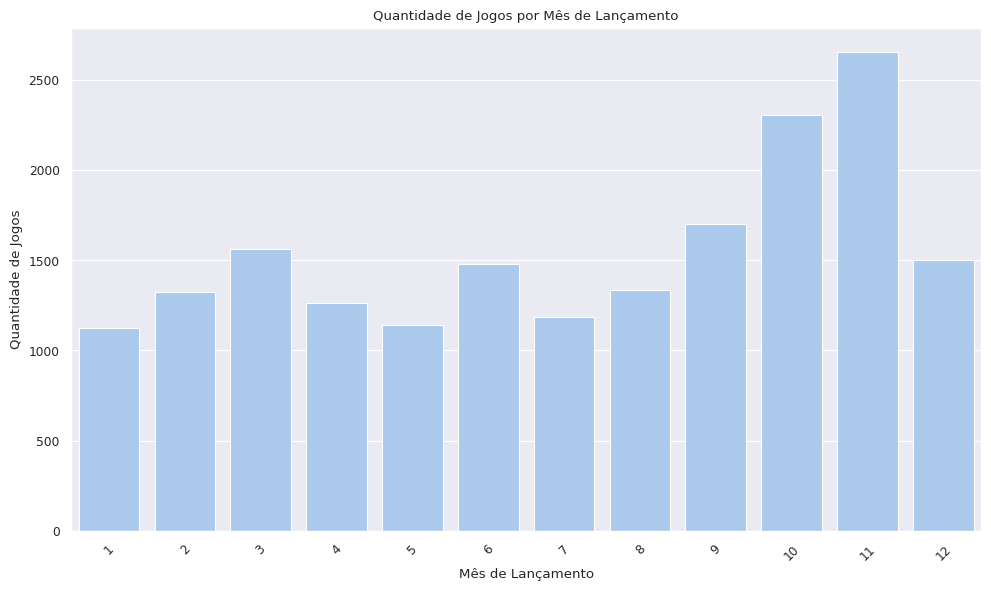

In [80]:
# Configurações de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# Conta a quantidade de jogos por mês
contagem_meses = games['Mês de Lançamento'].value_counts().sort_index().reset_index()
contagem_meses.columns = ['Mês', 'Quantidade']

# GRÁFICO DE BARRAS para a quantidade de jogos por mês
plt.figure(figsize=(10, 6))
sns.barplot(data=contagem_meses, x='Mês', y='Quantidade')
plt.title('Quantidade de Jogos por Mês de Lançamento')
plt.xlabel('Mês de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**JOGOS POR INTERVALO DE DIAS**

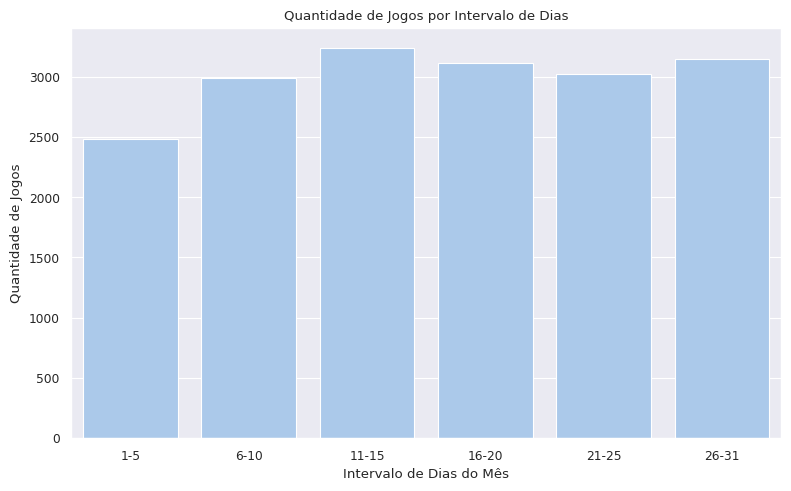

In [83]:
# Configurações de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# Agrupa dias em intervalos
bins = [1, 5, 10, 15, 20, 25, 31]  # Define os limites dos intervalos
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-31']  # Rotula cada intervalo
games['Intervalo de Dias'] = pd.cut(games['Dia de Lançamento'], bins=bins, labels=labels, right=True)

# Conta a quantidade de jogos por intervalo de dias
contagem_intervalo_dias = games['Intervalo de Dias'].value_counts().sort_index().reset_index()
contagem_intervalo_dias.columns = ['Intervalo de Dias', 'Quantidade']

# GRÁFICO DE BARRAS para a quantidade de jogos por intervalo de dias
plt.figure(figsize=(8, 5))
sns.barplot(data=contagem_intervalo_dias, x='Intervalo de Dias', y='Quantidade')
plt.title('Quantidade de Jogos por Intervalo de Dias')
plt.xlabel('Intervalo de Dias do Mês')
plt.ylabel('Quantidade de Jogos')
plt.tight_layout()
plt.show()

**NOTAS POR PLATAFORMA**

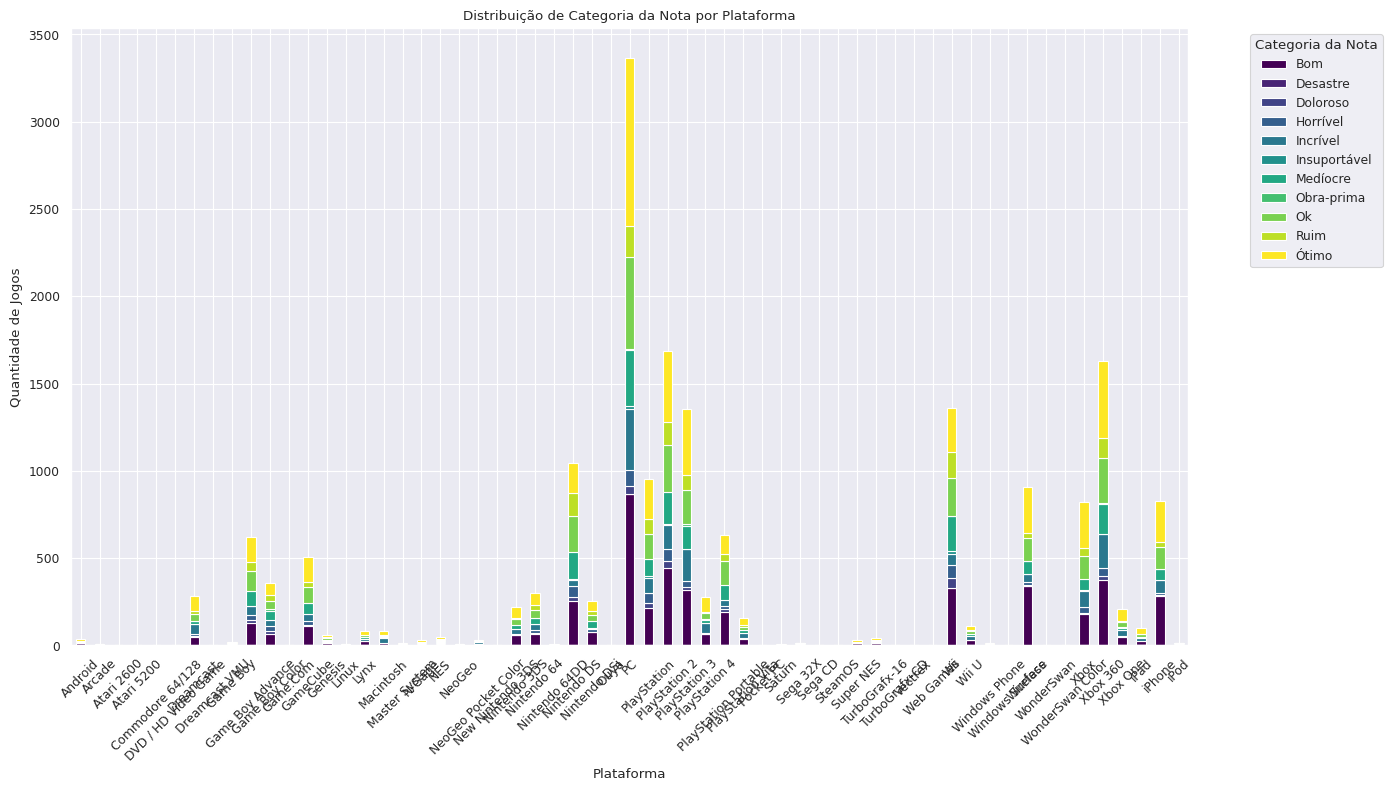

In [88]:
# Configuração de estilo
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# Contagem de jogos por Categoria da Nota e Plataforma
categoria_por_plataforma = games.groupby(['Plataforma', 'Categoria da Nota']).size().unstack(fill_value=0)

# Gráfico de barras empilhadas para Categoria da Nota por Plataforma
categoria_por_plataforma.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribuição de Categoria da Nota por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.legend(title='Categoria da Nota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
